In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [25]:
# read the data
df = pd.read_csv(r"C:\Users\KAJAL NANDHA\Downloads\IMDb Movies India.csv", encoding="latin1")
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Display first 5 rows
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [29]:
#Display last 5 rows
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [31]:
# Checking  summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [33]:
# checking basic statistical details
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [35]:
df.shape

(15509, 10)

In [37]:
# check missing value or NULL values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [39]:
df.dropna(subset=["Rating"], inplace = True)  
df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [41]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)


In [43]:
df.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [45]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [47]:
df['Duration'] = df['Duration'].str.strip('min').str.strip()  # Remove 'min' and any extra spaces
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')  # Convert to numeric, setting errors to NaN

# Fill missing values with the median
df['Duration'].fillna(df['Duration'].median(), inplace=True)

In [49]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   object 
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), object(8)
memory usage: 649.5+ KB


EDA (Exploratory data Analysis)

In [54]:
# find top 10 movies based on rating
top_movie = df.loc[df['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94.0,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79.0,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,(2020),135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,(2020),113.0,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,(2019),105.0,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,(2021),93.0,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,(2021),56.0,"Documentary, History",9.3,"1,373",Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,(2019),90.0,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,(2021),101.0,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,(2018),97.0,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


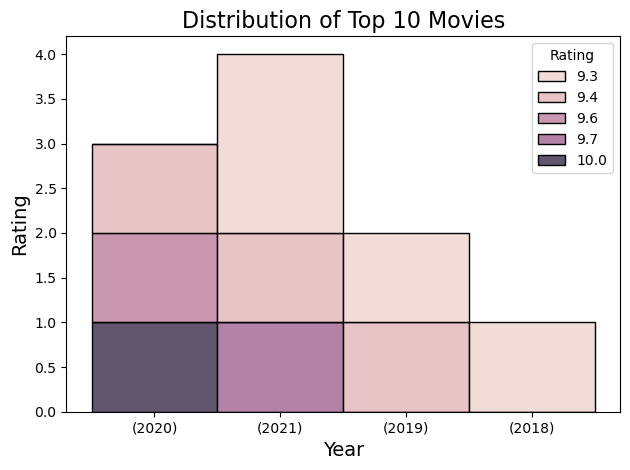

In [56]:
#Distribution of Top 10 movies wrt Year
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

In [57]:
# Distribution of Genre of movies
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291


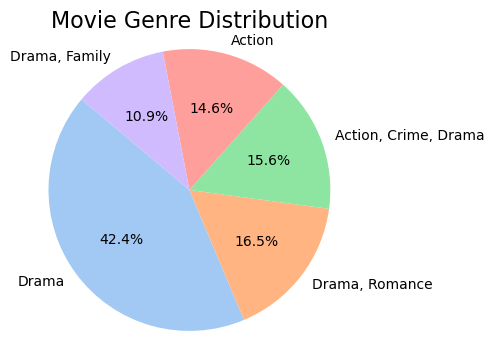

In [58]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()
     

In [59]:
# Distribution of Top directors by average rating

# Group the data by director and calculate the average rating
director_avg_rating = df.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


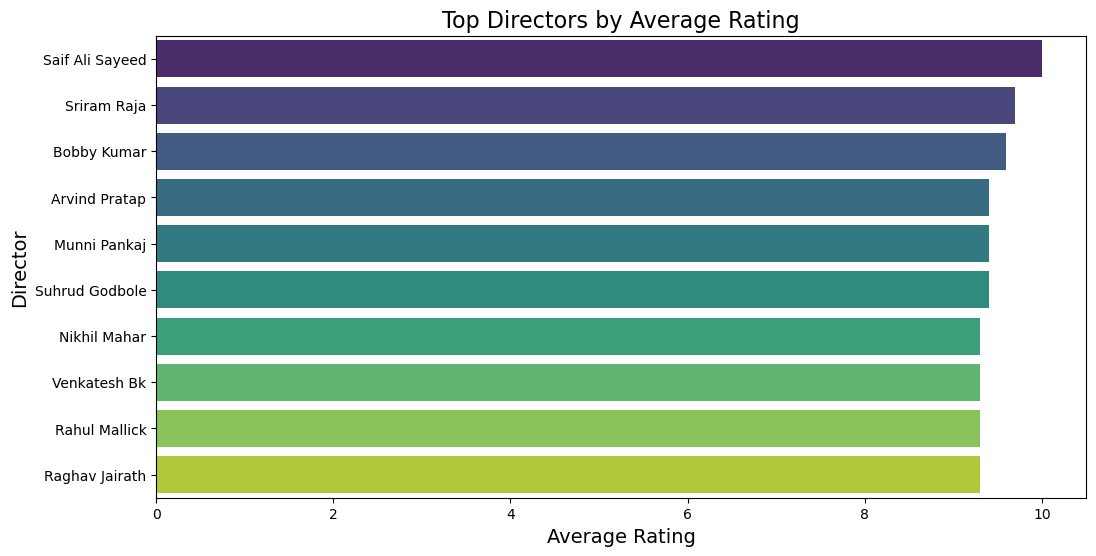

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')

plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)

plt.show()

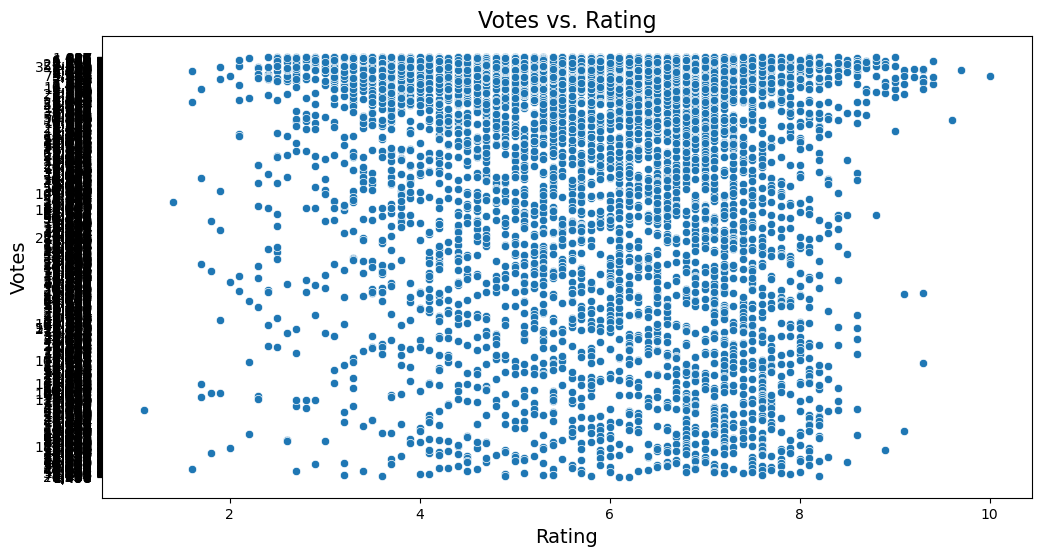

In [65]:
# Relationship between the number of votes and movie ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rating', y='Votes',palette= "deep")

plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)

plt.show()

In [66]:
# Distribution of top actors by number of movie
actor_counts = df['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


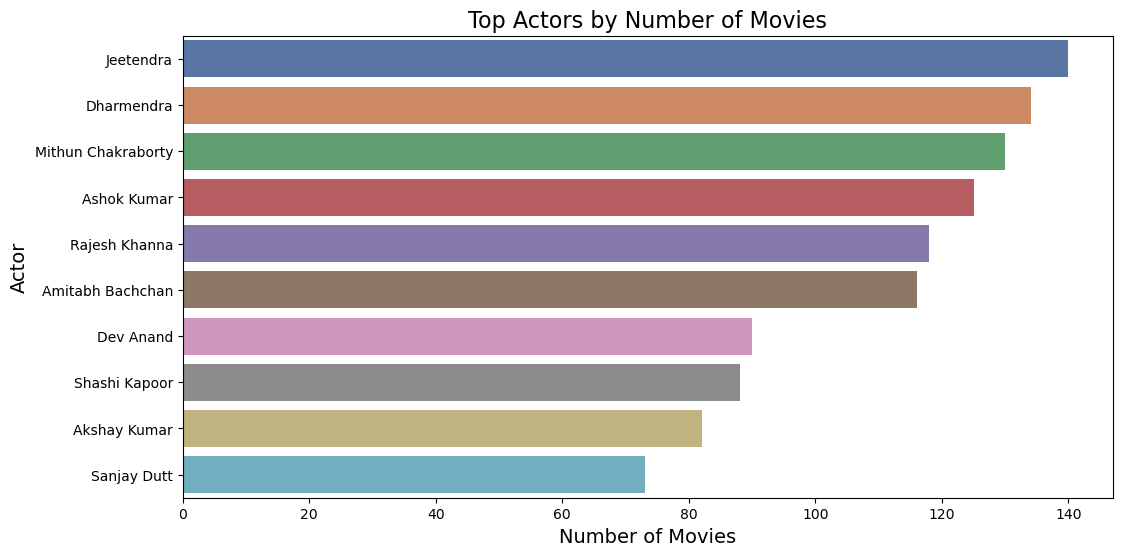

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h',palette= "deep")

# Set plot labels and title
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Show the plot
plt.show()

In [68]:
# Distribution of number of movie released every year

yearly_movie_counts = df['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
91,(1917),1
88,(1931),3
89,(1932),2
86,(1933),4
90,(1934),2
...,...,...
1,(2017),223
2,(2018),214
0,(2019),238
9,(2020),157


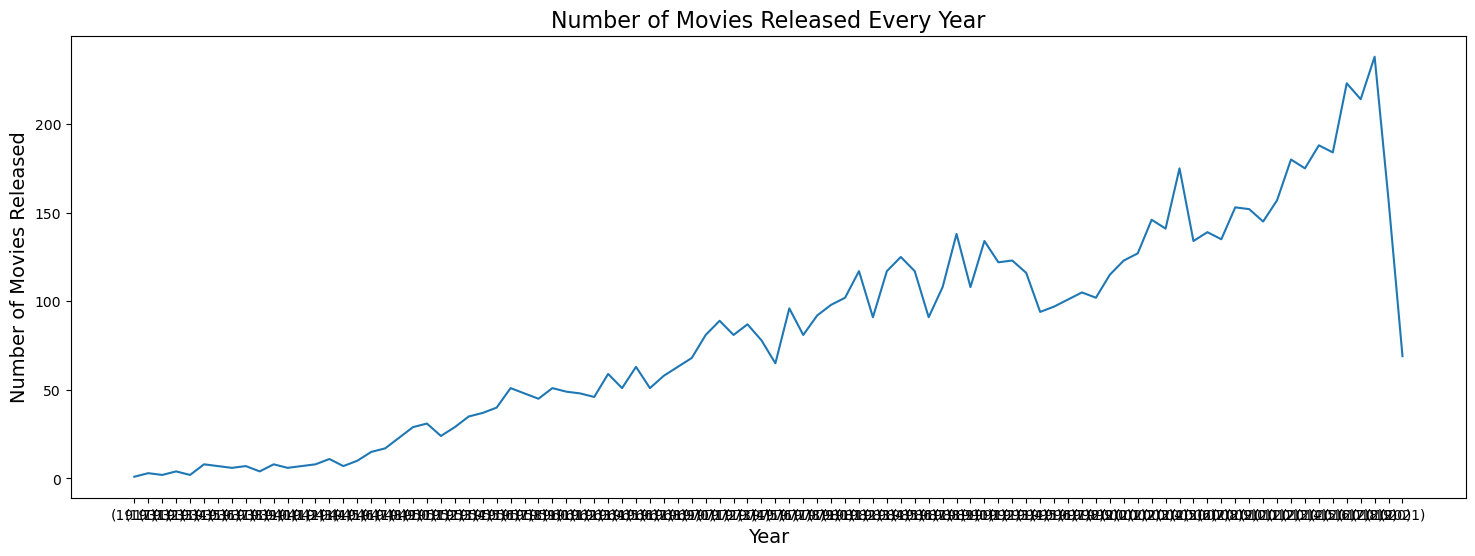

In [70]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)

plt.show()

In [82]:
print(df.dtypes)

     



Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [106]:
# Convert 'Rating' column from float to int
df['Rating'] = df['Rating'].astype(int)



In [108]:
df['Rating'] = df['Rating'].fillna(0).astype(int)  # Replace NaN with 0, then convert


In [110]:
df['Rating'] = df['Rating'].round().astype(int)  # Round to the nearest integer


In [112]:
print(df['Rating'].dtype)  # Should return 'int64' or 'int32'
print(df[['Rating']].head(10))  # Inspect the first 10 values


int32
    Rating
1        7
3        4
5        4
8        5
9        4
10       6
11       5
12       6
13       5
18       6


In [116]:
filtered_df = df[(df['Rating'] > 5) & (df['Votes'] > 100)]
filtered_df.head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12,100 Days,(1991),161,"Horror, Romance, Thriller",6,983.0,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
18,10ml LOVE,(2010),87,"Comedy, Drama, Romance",6,162.0,Sharat Katariya,Neil Bhoopalam,Anusha Bose,Manu Rishi Chadha
62,22 Yards,(2019),126,Sport,6,361.0,Mitali Ghoshal,Barun Sobti,Amartya Ray,Rajit Kapoor
69,27 Down,(1974),115,Drama,6,194.0,Awtar Krishna Kaul,Sudhir Dalvi,Rakhee Gulzar,Sadhu Meher
78,3 Storeys,(2018),100,Drama,6,358.0,Arjun Mukerjee,Aisha Ahmed,Tarun Anand,Richa Chadha
85,36 Chowringhee Lane,(1981),122,"Drama, Romance",7,392.0,Aparna Sen,Jennifer Kendal,Dhritiman Chatterjee,Debashree Roy
86,36 Ghante,(1974),135,"Action, Crime, Drama",6,128.0,Raj Tilak,Raaj Kumar,Mala Sinha,Sunil Dutt
137,A Billion Colour Story,(2016),105,Drama,8,412.0,Padmakumar Narasimhamurthy,Dhruva Padmakumar,Gaurav Sharma,Vasuki
146,A Film by Aravind,(2005),150,"Horror, Mystery",6,179.0,Sekhar Suri,Sherlyn Chopra,Rajeev Kanakala,Richard Rishi
149,A Game Called Relationship,(2020),109,"Comedy, Romance",6,181.0,Vivek Sharma,Mandy Takhar,Vivek Sharma,Sumit Suri


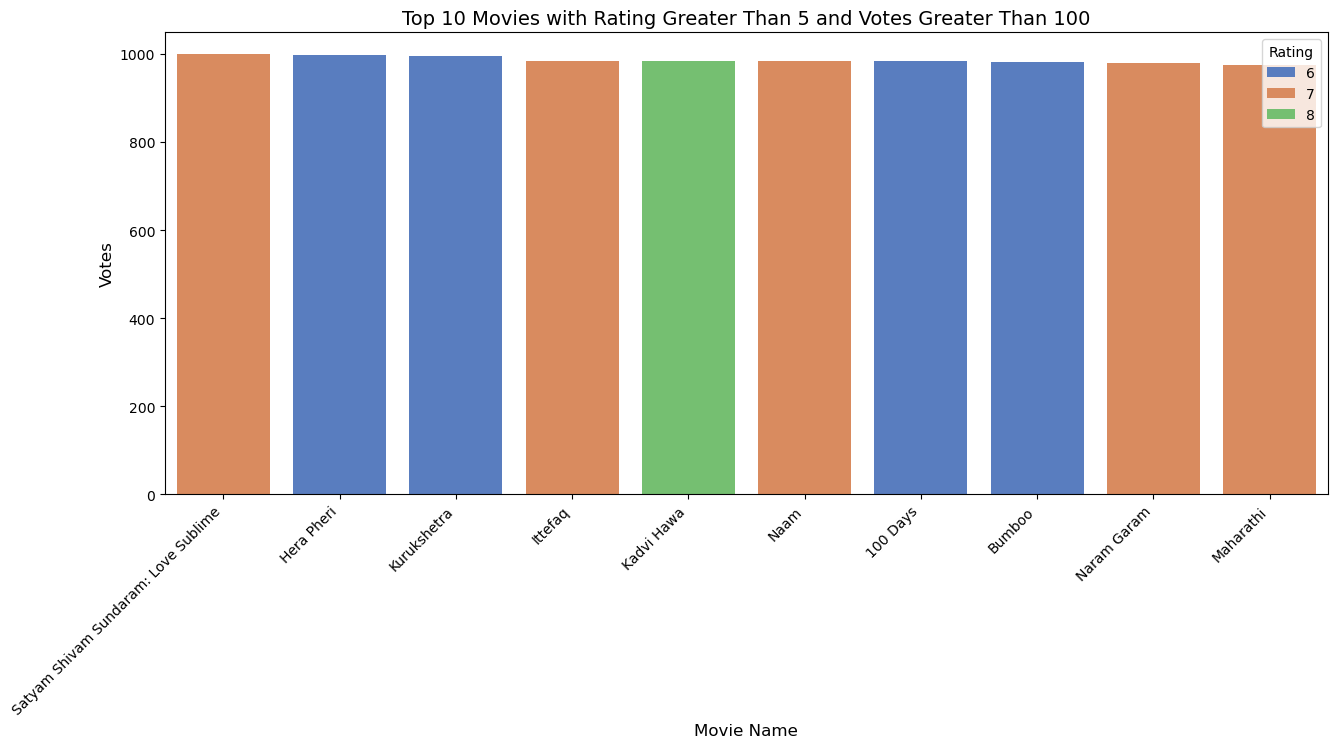

In [132]:
# Limit to top 10 movies with the highest votes
filtered_df = filtered_df.sort_values(by='Votes', ascending=False).head(30)

# Create the bar plot
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=filtered_df, x='Name', y='Votes', hue='Rating', dodge=False, palette='muted')

# Customize plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.legend(loc='upper right', title='Rating')
ax.set_xlabel('Movie Name', fontsize=12)
ax.set_ylabel('Votes', fontsize=12)
ax.set_title('Top 10 Movies with Rating Greater Than 5 and Votes Greater Than 100', fontsize=14)

# Show plot
plt.show()


Text(0, 0.5, 'Movie Name')

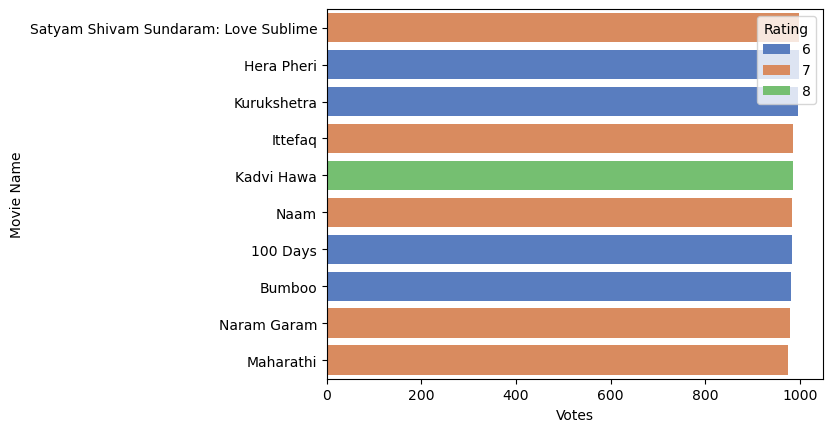

In [130]:
sns.barplot(data=filtered_df, y='Name', x='Votes', hue='Rating', palette='muted', dodge=False)
plt.xlabel('Votes')
plt.ylabel('Movie Name')


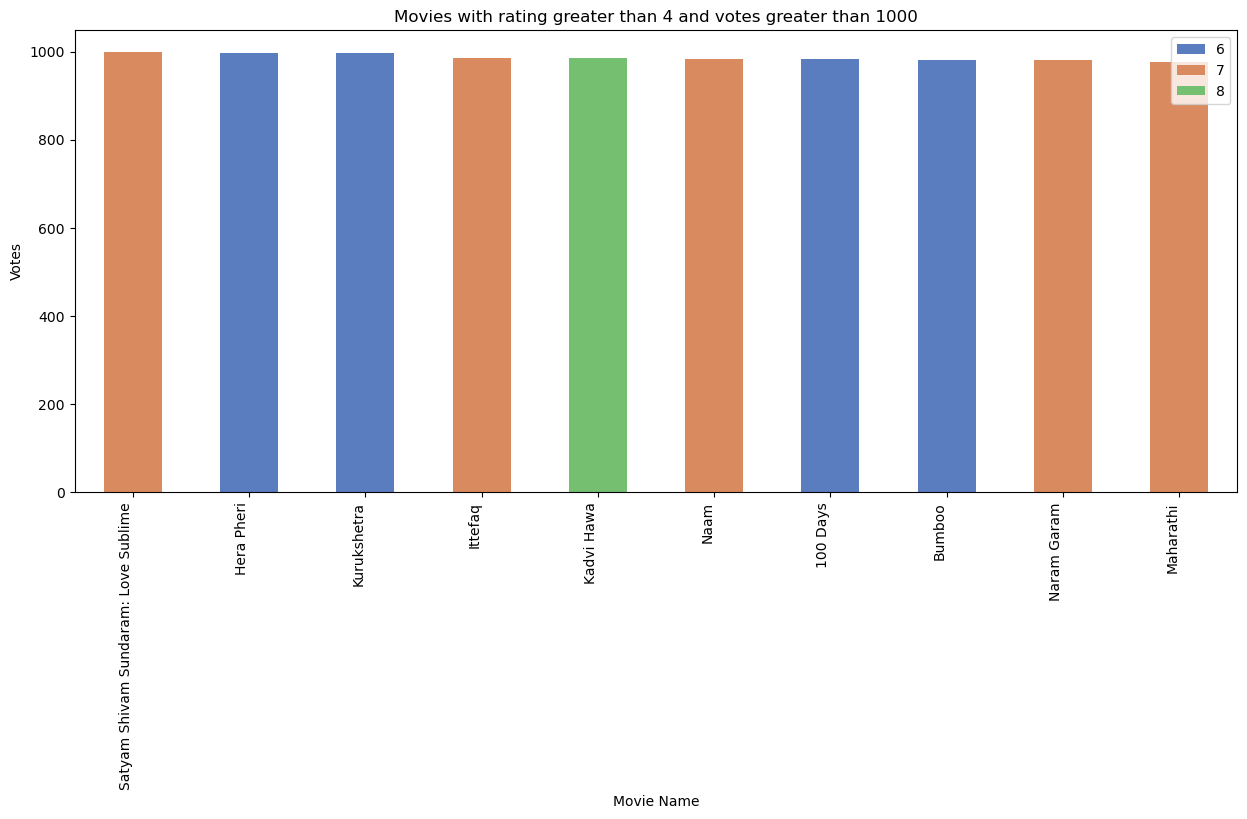

In [134]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(data=filtered_df,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 4 and votes greater than 1000')

plt.show()

In [144]:
# Distribution of Number of movies each genre
df['Genre'] = df['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre_df = df.explode('Genre')
genre_df




,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110,Comedy,4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,(2019),110,Romance,4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147,Comedy,4,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147,Drama,4,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),135,Action,4,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129,Action,4,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,(1999),129,Drama,4,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,(1998),130,Action,6,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


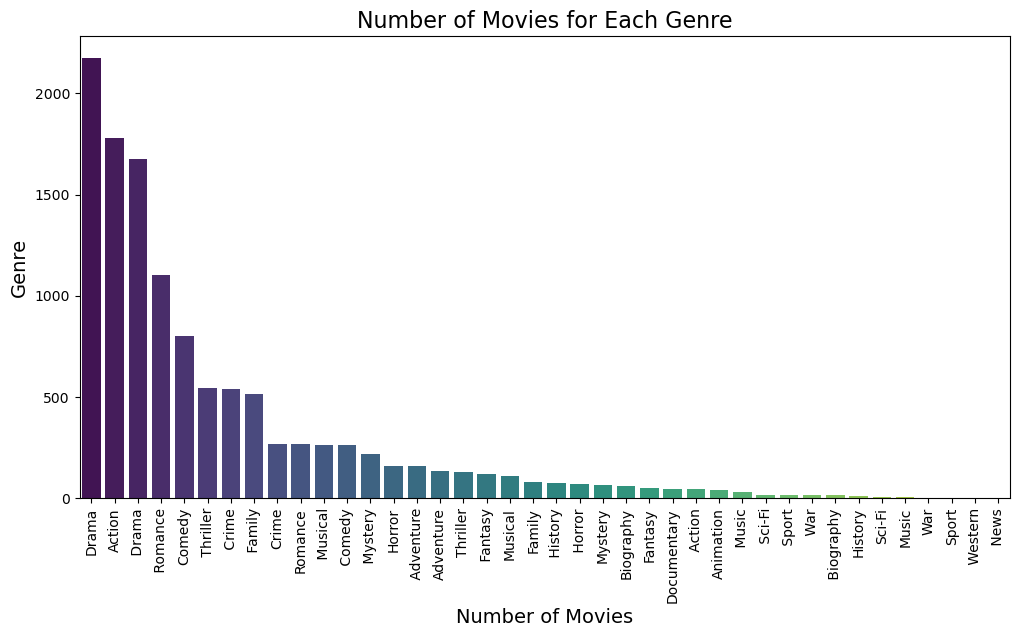

In [146]:
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

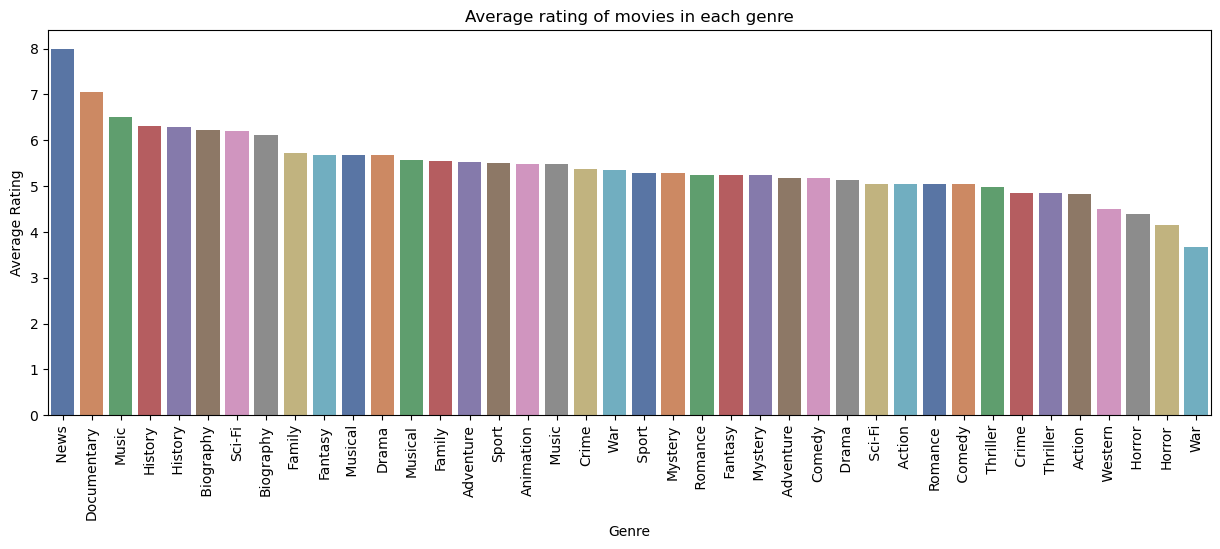

In [148]:
# Distribution of Average rating of movies in each genre
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)
     

plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='deep')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)

plt.show()

Featured Engineering


In [150]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = df.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(df['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(df['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(df['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(df['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(df['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109,227,7,8.0,660,1547,2442,322
3,(2019),110,184,4,35.0,1453,1373,772,2238
5,(1997),147,159,4,827.0,1670,442,72,2135
8,(2012),82,317,5,326.0,134,2184,1272,1044
9,(2014),116,30,4,11.0,414,351,614,490


In [154]:
print(trans_data.head())
# Convert numeric-looking strings to actual numbers
trans_data = trans_data.apply(pd.to_numeric, errors='coerce')
numeric_columns = trans_data.select_dtypes(include=['number'])
sc_data = scaler.fit_transform(numeric_columns)
sc_df = pd.DataFrame(sc_data, columns=numeric_columns.columns)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

     Year  Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  Actor 3
1  (2019)       109    227       7    8.0       660     1547     2442      322
3  (2019)       110    184       4   35.0      1453     1373      772     2238
5  (1997)       147    159       4  827.0      1670      442       72     2135
8  (2012)        82    317       5  326.0       134     2184     1272     1044
9  (2014)       116     30       4   11.0       414      351      614      490


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,0.384279,0.597368,0.666667,0.003018,0.250855,0.700000,0.980329,0.121053
1,NaN,0.388646,0.484211,0.333333,0.030181,0.552261,0.621267,0.309916,0.841353
2,NaN,0.550218,0.418421,0.333333,0.826962,0.634740,0.200000,0.028904,0.802632
3,NaN,0.266376,0.834211,0.444444,0.322938,0.050931,0.988235,0.510638,0.392481
4,NaN,0.414847,0.078947,0.333333,0.006036,0.157355,0.158824,0.246487,0.184211


Examine Correlation of Data


In [156]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Genre       0.144749
Actor 1     0.052470
Actor 2     0.052431
Actor 3     0.029199
Votes       0.004899
Director   -0.013596
Duration   -0.030634
Year             NaN
Name: Rating, dtype: float64

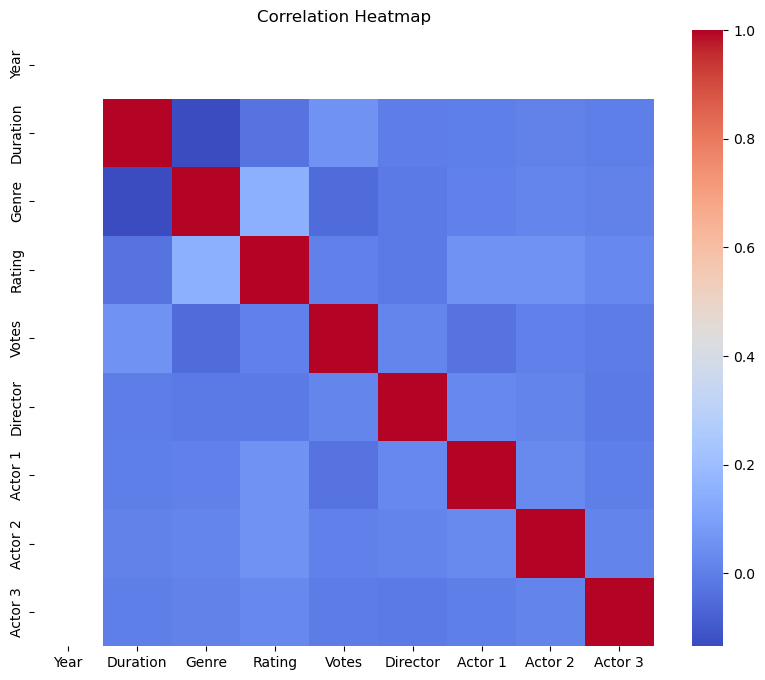

In [158]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df,annot=False,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

Now our transformed columns are much correlated with the target variable so we are ready to go


Model Building


In [170]:
import pandas as pd

# Ensure X_train is a DataFrame
X_train = pd.DataFrame(X_train)

# Combine X_train and y_train into a single DataFrame to drop NaN values from both
combined = pd.concat([X_train, pd.Series(y_train, name="target")], axis=1)

# Drop any rows with NaN values
combined = combined.dropna()

# Separate back into X_train and y_train
X_train = combined.drop(columns=["target"])
y_train = combined["target"]


In [174]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
print(lr)


LinearRegression()


In [176]:
from sklearn.linear_model import LinearRegression
from IPython.display import display

lr = LinearRegression()
display(lr)


LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [182]:
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [186]:
# Predictions
# Assuming you have already defined and fitted the imputer on X_train
X_test = imputer.transform(X_test)

# Make predictions
y_pred_lr = lr.predict(X_test)

y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [188]:


# Ensure X_test is a DataFrame
X_test = pd.DataFrame(X_test)

# Drop rows with NaN values
X_test = X_test.dropna()

# Make predictions
y_pred_lr = lr.predict(X_test)


In [190]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Use a different model
hist_regressor = HistGradientBoostingRegressor()
hist_regressor.fit(X_train, y_train)
y_pred_hist = hist_regressor.predict(X_test)


In [192]:
# Evaluation
print("Linear Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))

print("\nDecision Tree Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R-squared:", r2_score(y_test, y_pred_dt))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))

Linear Regression Metrics:
Mean Squared Error: 1.813478067030303
R-squared: 0.02276683327692841
Mean Absolute Error: 1.08642173516564

Decision Tree Regression Metrics:
Mean Squared Error: 3.007269789983845
R-squared: -0.620534504102956
Mean Absolute Error: 1.3093699515347335


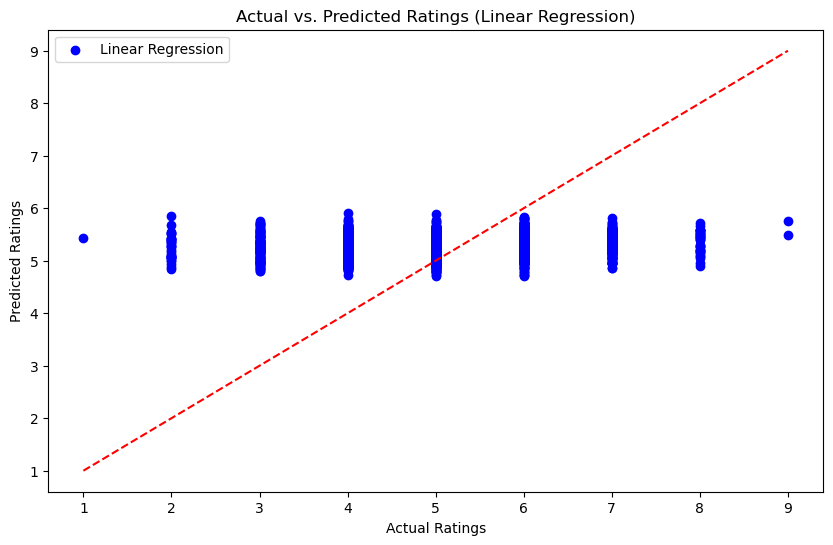

In [194]:
# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Ratings (Linear Regression)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

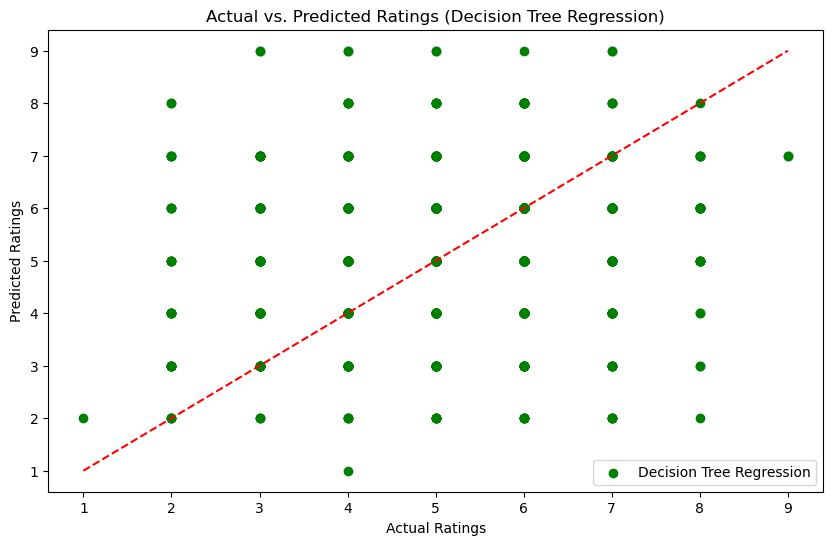

In [196]:
# Scatter plot for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Ratings (Decision Tree Regression)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

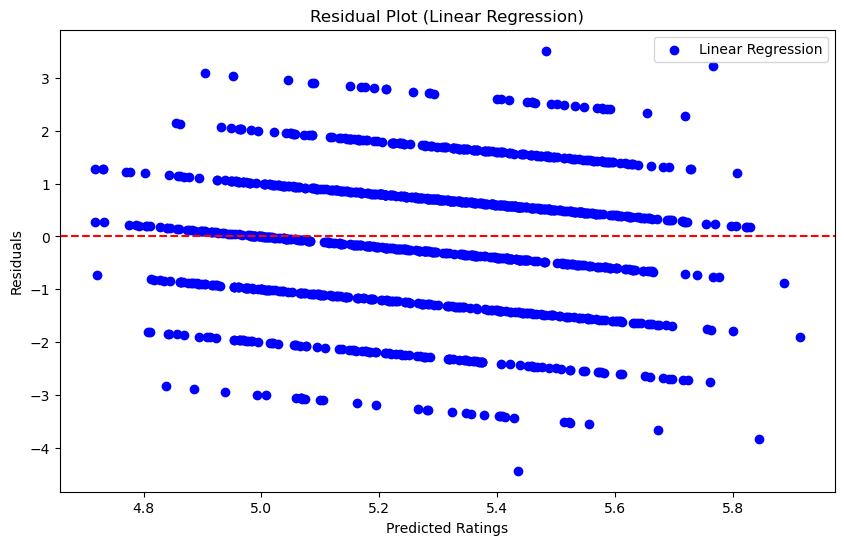

In [198]:
# Residual plots for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, y_test - y_pred_lr, color='blue', label='Linear Regression')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.legend()
plt.show()

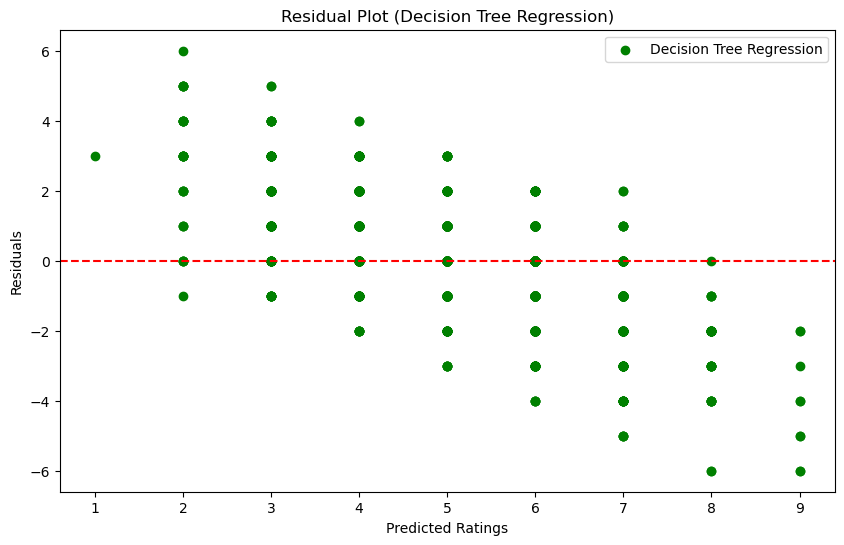

In [200]:
# Residual plots for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_dt, y_test - y_pred_dt, color='green', label='Decision Tree Regression')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Decision Tree Regression)')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.legend()
plt.show()

Comparison of Model


In [202]:
# Compute metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Compute metrics for Decision Tree Regression
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

In [204]:
# Print the metrics
print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)
print("Mean Absolute Error:", mae_lr)
print("\nDecision Tree Regression Metrics:")
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)
print("Mean Absolute Error:", mae_dt)
     


Linear Regression Metrics:
Mean Squared Error: 1.813478067030303
R-squared: 0.02276683327692841
Mean Absolute Error: 1.08642173516564

Decision Tree Regression Metrics:
Mean Squared Error: 3.007269789983845
R-squared: -0.620534504102956
Mean Absolute Error: 1.3093699515347335


Visual Comparison


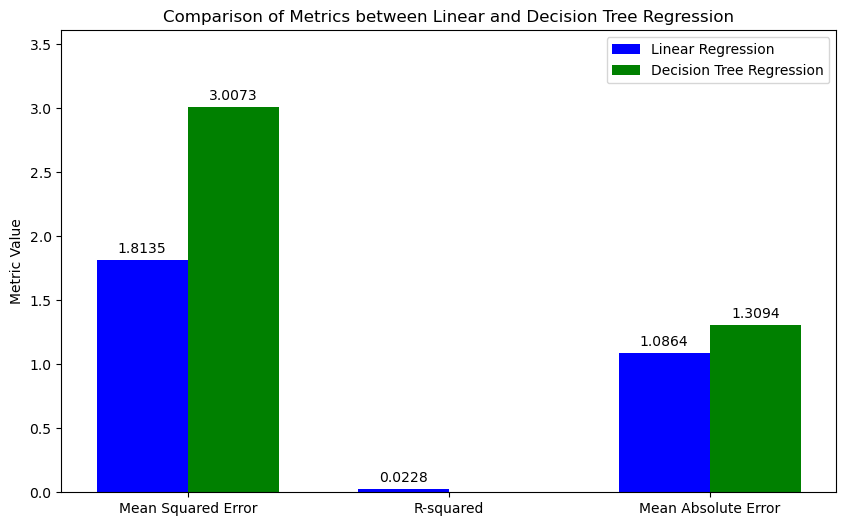

In [206]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for array operations

# Assuming you have already computed lr_metrics and dt_metrics
metrics = ['Mean Squared Error', 'R-squared', 'Mean Absolute Error']
lr_metrics = [mse_lr, r2_lr, mae_lr]
dt_metrics = [mse_dt, r2_dt, mae_dt]

x = np.arange(len(metrics))  # Use numpy array for arithmetic operations
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lr_metrics, width, label='Linear Regression', color='blue')
rects2 = ax.bar(x + width/2, dt_metrics, width, label='Decision Tree Regression', color='green')

ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Metrics between Linear and Decision Tree Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, max(max(lr_metrics), max(dt_metrics)) * 1.2)  # Setting ylim for better visualization
plt.show()